In [35]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Rahma
[nltk_data]     Fahim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Reading dataset 

train_df=pd.read_csv(r"C:\Users\Rahma Fahim\Downloads\train (1).csv")
test_df=pd.read_csv(r"C:\Users\Rahma Fahim\Downloads\test (1).csv")

In [3]:
train_df.head()

,Tweets,label
0,Asked #ChatGPT about what it thinks are the pr...,Positive
1,#ChatGPT tornado has already traveled around t...,Neutral
2,This is a great explanation of why #EVs are mo...,Positive
3,‘if you need to write a box-ticking social med...,Positive
4,Just saw an AI tool making my coffee for me. \...,Positive


In [4]:
test_df.head()

,@CoffeeVectors @jenny____r confirmed #ChatGPT has dad jokes https://t.co/tC2Sks2f76,Positive
0,Sooooo depressing (our competition as journos ...,Negative
1,I just had a 4 hour deep conversation with #Ch...,Positive
2,I began to explore #chatgpt today.\n\nI asked ...,Negative
3,/2023\n1. Ask #ChatGPT\n2. Add some content\n3...,Positive
4,#Explained: Are you soon going to be replaced?...,Negative


## EDA

In [5]:
train_df.shape

(770, 2)

In [6]:
test_df.shape

(170, 2)

In [7]:
train_df.label.value_counts()

label
Positive    378
Negative    143
Neutral      78
Name: count, dtype: int64

In [8]:
train_df.isnull().sum()

Tweets    171
label     171
dtype: int64

In [9]:
train_df['Tweets'][30]

"Is Google's Era of Search coming to an End? \n\nRead the full post below:\n\nlinkedin.com/feed/update/ur…\n\n#google #artificialintelligence #ChatGPT #ai https://t.co/ndT66Jv383"

In [10]:
df_0=train_df[train_df['label']=='Neutral']
df_1=train_df[train_df['label']=='Positive']
df_2= train_df[train_df['label']=='Negative']

Text(0.5, 1.0, 'Word Cloud for target -- Neutral')

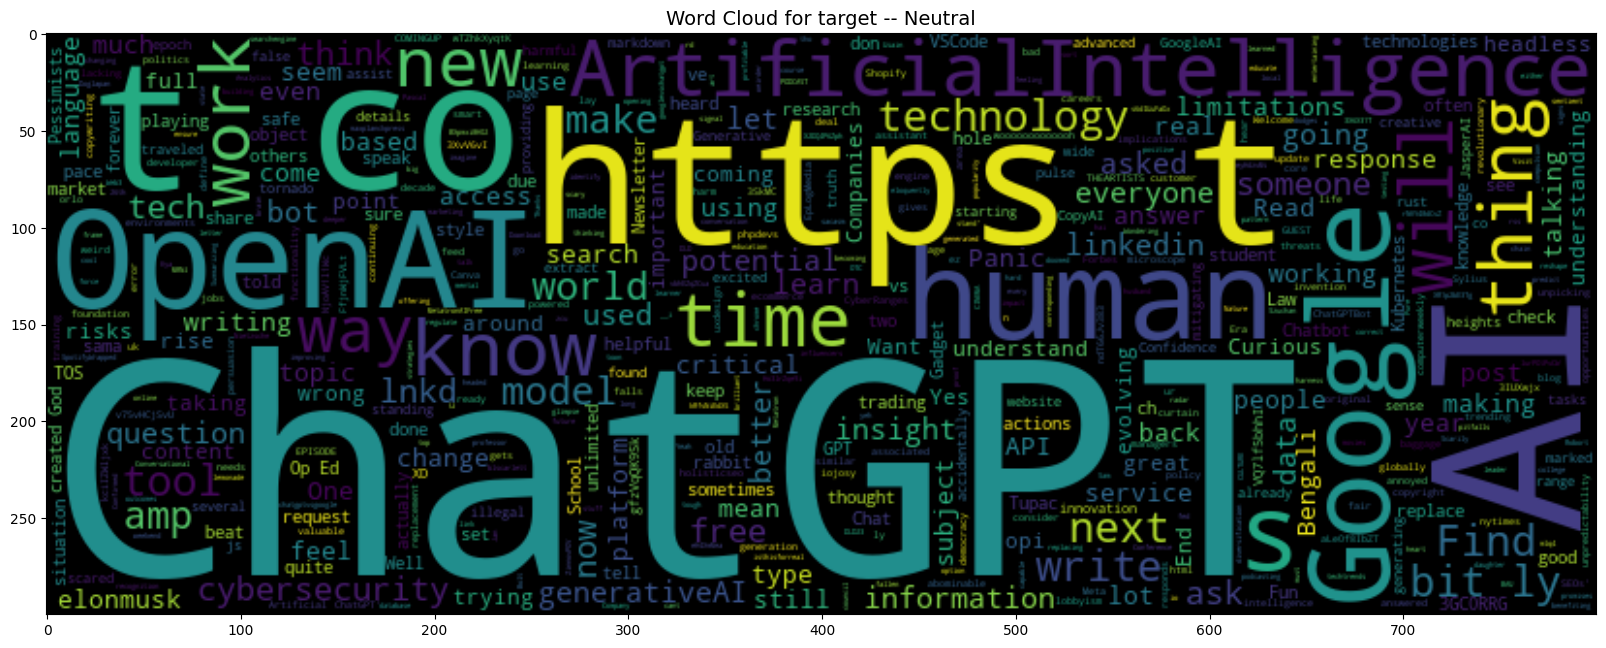

In [11]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=800, height=300).generate(" ".join(df_0.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for target -- Neutral", fontsize=14)

Text(0.5, 1.0, 'Word Cloud for target -- Positive')

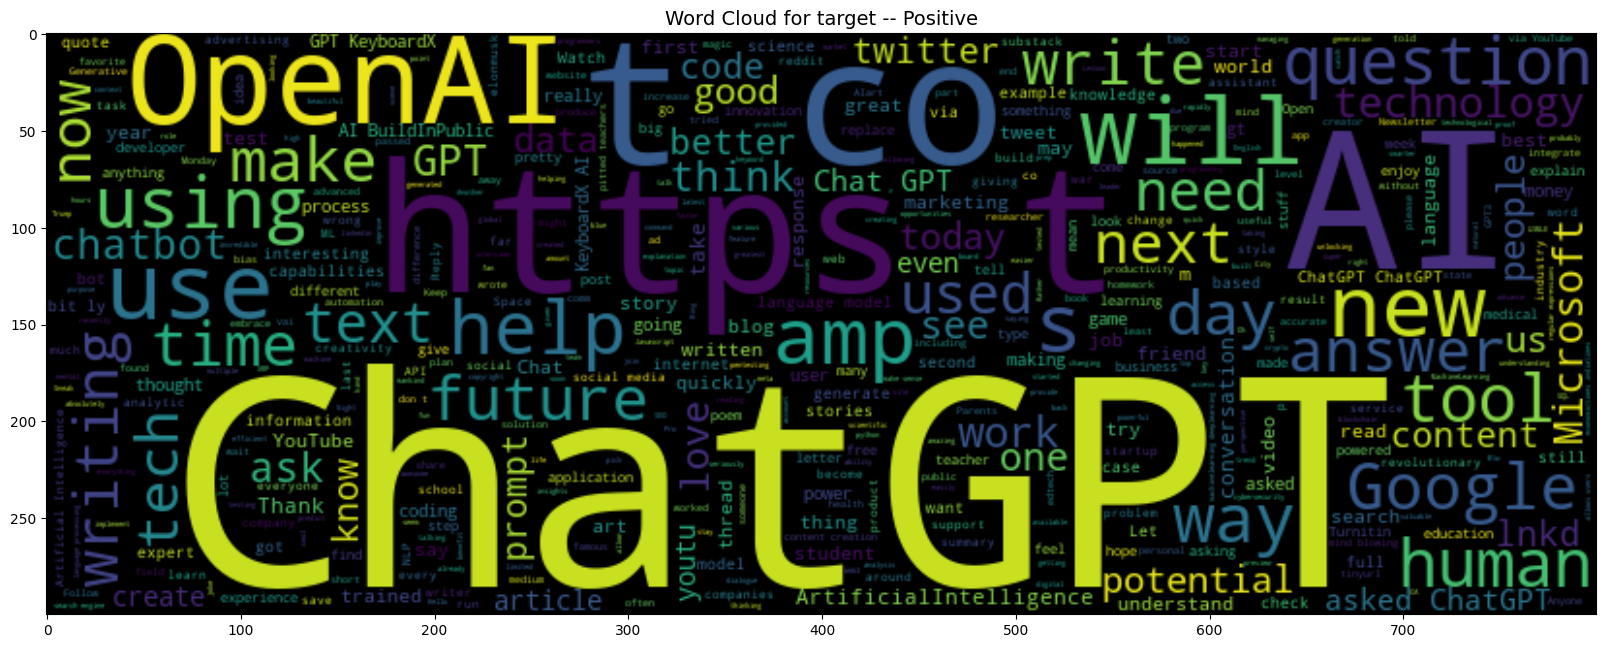

In [12]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=800, height=300).generate(" ".join(df_1.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for target -- Positive", fontsize=14)

Text(0.5, 1.0, 'Word Cloud for target -- Negative')

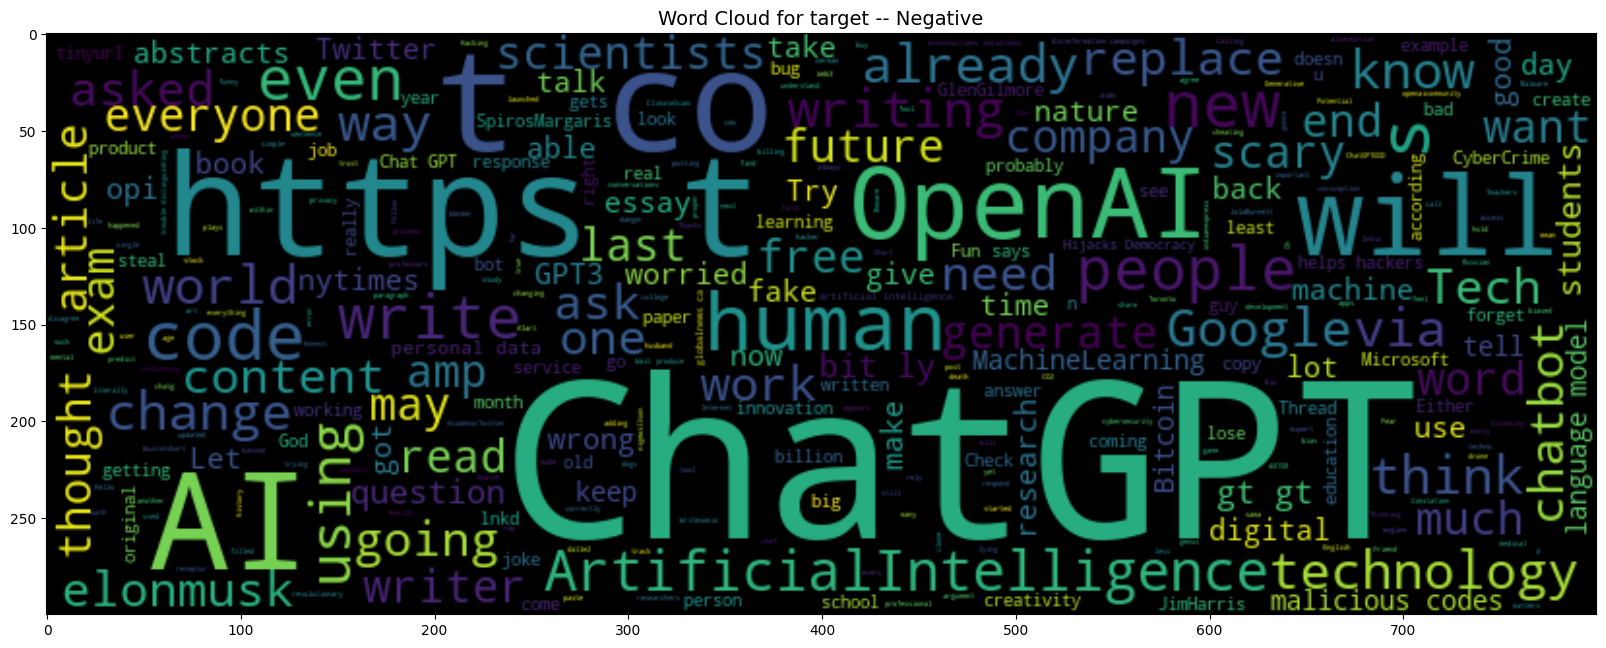

In [13]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=800, height=300).generate(" ".join(df_2.Tweets))
plt.imshow(wc, interpolation='bilinear')
plt.title("Word Cloud for target -- Negative", fontsize=14)

## Data Prepocessing

In [14]:
train_df=train_df.dropna()

In [15]:
train_df.isnull().sum()

Tweets    0
label     0
dtype: int64

In [18]:
# To remove quotes and allocating that with spaces

for i, col in enumerate(train_df.columns):
    train_df.iloc[:,i]=train_df.iloc[:,i].astype(str).str.replace("'",'')

In [19]:
for i, col in enumerate(test_df.columns):
    test_df.iloc[:,i]=test_df.iloc[:,i].astype(str).str.replace("'",'')

In [ ]:
train_df['Tweets'] = train_df['Tweets'].str.replace('[^\w\s]', '')  # Remove punctuation
train_df['Tweets'] = train_df['Tweets'].str.replace('@\w+', '')  # Remove mentions
train_df['Tweets'] = train_df['Tweets'].str.replace('http\S+|www.\S+', '')  # Remove URLs
train_df['Tweets'] = train_df['Tweets'].str.replace('#', '')  # Remove hashtags
train_df['Tweets']= train_df['Tweets'].apply(lambda x: x.lower())  # Convert text to lowercase


In [ ]:
train_df.head()

,Tweets,label
0,asked chatgpt about what it thinks are the pro...,Positive
1,chatgpt tornado has already traveled around th...,Neutral
2,this is a great explanation of why evs are mor...,Positive
3,‘if you need to write a box-ticking social med...,Positive
4,just saw an ai tool making my coffee for me. \...,Positive


In [ ]:
train_df['label'] = train_df['label'].map( {'Positive': 1, 'Neutral': 0, 'Negative': 2} )

In [ ]:
train_df.head()

,Tweets,label
0,asked chatgpt about what it thinks are the pro...,1
1,chatgpt tornado has already traveled around th...,0
2,this is a great explanation of why evs are mor...,1
3,‘if you need to write a box-ticking social med...,1
4,just saw an ai tool making my coffee for me. \...,1


In [25]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_df['Tweets'])
X_train = tokenizer.texts_to_sequences(train_df['Tweets'])
X_test= tokenizer.texts_to_sequences(test_df.iloc[:, 0])
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

## Model Building - LSTM

In [27]:
## Define the LSTM model

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=maxlen))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

In [29]:
## Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
## Train the Model
y_train = pd.get_dummies(train_df['label']).values
y_test = pd.get_dummies(test_df.iloc[:, 1]).values

model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)




Epoch 1/10


15/15 [==============================] - 6s 103ms/step - loss: 0.9832 - accuracy: 0.6263 - val_loss: 0.9166 - val_accuracy: 0.6500
Epoch 2/10
15/15 [==============================] - 1s 66ms/step - loss: 0.9076 - accuracy: 0.6263 - val_loss: 0.9077 - val_accuracy: 0.6500
Epoch 3/10
15/15 [==============================] - 1s 62ms/step - loss: 0.8983 - accuracy: 0.6263 - val_loss: 0.9134 - val_accuracy: 0.6500
Epoch 4/10
15/15 [==============================] - 1s 59ms/step - loss: 0.9008 - accuracy: 0.6263 - val_loss: 0.9095 - val_accuracy: 0.6500
Epoch 5/10
15/15 [==============================] - 1s 57ms/step - loss: 0.8975 - accuracy: 0.6263 - val_loss: 0.9084 - val_accuracy: 0.6500
Epoch 6/10
15/15 [==============================] - 1s 59ms/step - loss: 0.8995 - accuracy: 0.6263 - val_loss: 0.9085 - val_accuracy: 0.6500
Epoch 7/10
15/15 [==============================] - 1s 58ms/step - loss: 0.8979 - accuracy: 0.6263 - val_loss: 0.9128 - val_accuracy: 0.6500
Epoch 8/10

In [34]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

6/6 [==============================] - 0s 13ms/step - loss: 0.8470 - accuracy: 0.6706
Accuracy: 0.6705882549285889
